In [1]:
import os
os.chdir('/Users/mac/Desktop/Work Space/Safe PM 2')

In [2]:
from datamanager import DataManager
from trainer import Trainer
from tester import Tester
from viz import Viz

import numpy as np
import torch
import utils

np.random.seed(1)
torch.manual_seed(1)
utils.SAVE_DIR += f"/seed{1}"

In [99]:
train_start = "2014-01-02"
train_end = "2020-12-31"
test_start = "2020-12-31"
test_end = "2021-12-31"

paths = ["Data/" + s for s in ["COST", "INCY"]]
datamanager = DataManager(paths, train_start, train_end, test_start, test_end)
train_data_tensor, test_data_tensor = datamanager.get_data_tensor()

K = train_data_tensor.shape[2]
F = train_data_tensor.shape[1]-1

In [110]:
parameters = {
            "lr1":1e-4, 
            "lr2":1e-3, 
            "tau":0.005, 
            "delta":0., 
            "alpha":0.5,
            "gamma":0.9,
            "K":K, "F":F, 
            "fee":0.0, 
            "term":60,
            "freq":50000,
            "cons":True,
            "balance":12000, 
            "episode":500,
            "min_trading_price":0,
            "max_trading_price":400,
            "batch_size":128,
            "memory_size":10000
            }

In [111]:
trainer = Trainer(**parameters, data=train_data_tensor)
trainer.train()
trainer.save_model(utils.SAVE_DIR + "/net.pth")

epi:0
cum cost:630
cum reward:1998.7930915449485
score r:1998.7930915449485
score c:630.0
cushion:0.03679058055029305
a:[-0.5079232  0.2554444]
c:0
alpha:tensor([[4.5768, 4.5144, 4.9912]])
log prob:-1.8020048141479492
value:tensor([[1.4469]])
const:3.5293441636876737
lam:0.003029344163687674
lam_grad:-3.0293441636876737
cum_fee:0.0
portfolio:[0.40405468 0.1291162  0.46682912]
profitloss:127.60154282796319
loss:-0.71269291639328

epi:1
cum cost:420
cum reward:2223.797029247184
score r:2111.295060396066
score c:525.0
cushion:0.043132464790721414
a:[ 0.01418866 -0.19727909]
c:0
alpha:tensor([[10.8311, 12.1640, 13.3540]])
log prob:1.5868263244628906
value:tensor([[5.9379]])
const:2.3832058289155724
lam:0.0049125499926032466
lam_grad:-1.8832058289155724
cum_fee:0.0
portfolio:[0.44062609 0.30616284 0.25321107]
profitloss:205.964471345917
loss:-0.1916605532169342

epi:2
cum cost:380
cum reward:2430.813485886743
score r:2217.801202226292
score c:476.6666666666667
cushion:0.04431262068006103
a:

In [56]:
datamanager.paths = ["Data/" + s for s in ["INCY", "REGN"]]
test_data_tensor2 = datamanager.get_data_tensor()[1]

In [ ]:
tester = Tester(**parameters, data=test_data_tensor)
tester.test(utils.SAVE_DIR + "/net.pth")

epi:_Test_BH
cum cost:200
cum reward:172.9494583926269
cushion:0.15331650340553837
a:[-0.01150788  0.00023937]
c:0
cum_fee:0.0
portfolio:[0.32235491 0.34280528 0.3348398 ]
profitloss:13.29768520573773

epi:_Test_mean
cum cost:190
cum reward:275.05906334801267
cushion:0.266345485418402
a:[4.25468517e-05 1.47071125e-06]
c:0
cum_fee:0.0
portfolio:[4.57786974e-05 9.99954221e-01 0.00000000e+00]
profitloss:50.40425399248398

epi:_Test_mode
cum cost:190
cum reward:275.05906334801267
cushion:0.266345485418402
a:[4.54674793e-05 1.47034971e-08]
c:0
cum_fee:0.0
portfolio:[4.57786974e-05 9.99954221e-01 0.00000000e+00]
profitloss:50.40425399248398

epi:_Test_cppi
cum cost:0
cum reward:0.0
cushion:0.0
a:[0. 0.]
c:0
cum_fee:0
portfolio:[1. 0. 0.]
profitloss:0.0



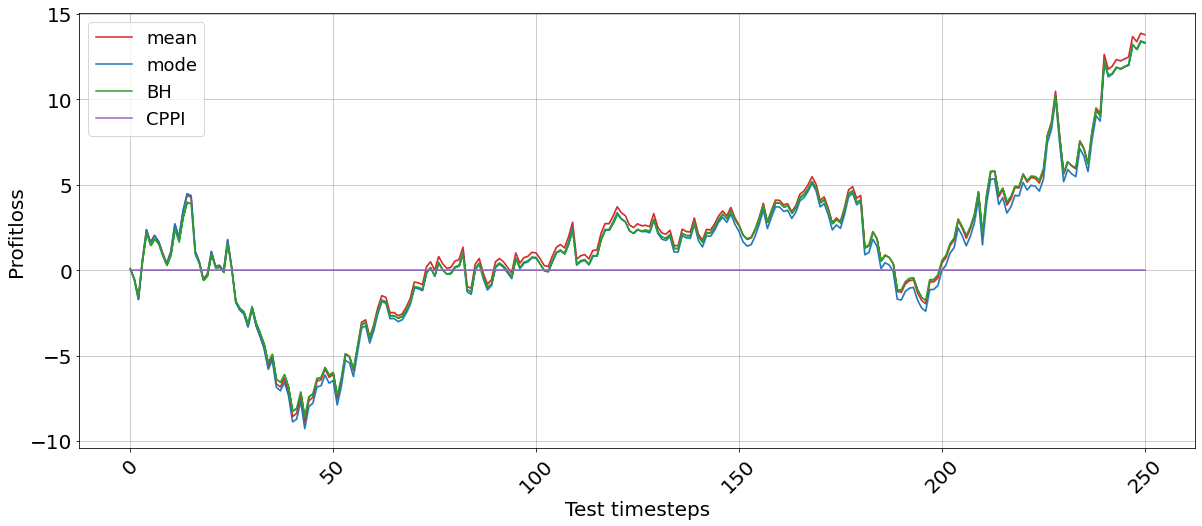

mean profitloss: 13.7859920376886
mode profitloss: 13.33908642938244
BH profitloss: 13.29768520573773
CPPI profitloss: 0.0


In [ ]:
viz = Viz()
viz.show(1,1, size=(20,8))